<a href="https://colab.research.google.com/github/MWSteams/4590FSP/blob/master/Rapid_Mix_Hydraulic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Rapid Mix Hydraulic - Potential Energy**

Authors: Cynthia Chu, Dominic Grasso, Yitzy Rosenberg

Team Name: Many Power Corgi Mode

[/Monroe/]: # (Well done! Great start. Check out the Cottonwood plant that the Fairmont plant will be eliminating and the LA filtration plant. See this new resource... https://github.com/MWSteams/4590FSP/blob/master/resources.md. Can you figure out what the rapid mix system is at the Cottonwood plant? The big question is whether the rapid mix is supposed to do something in addition to getting the coagulant equally mixed with water before it divides into multiple treatment trains. Happy to discuss this!)


In [2]:
!pip install aguaclara
!pip install molmass

     |████████████████████████████████| 92kB 2.9MB/s 
     |████████████████████████████████| 163kB 7.6MB/s 
  Created wheel for aguaclara: filename=aguaclara-0.2.0-cp36-none-any.whl size=99623 sha256=ea5123878f4e27961bdc69cc42e7358466b507e1dcf0748a9eb4e3390031b3ba
  Stored in directory: /root/.cache/pip/wheels/34/e9/34/0d3722243083a982623290c205c14a08b54ed290ee29219fd2
  Created wheel for pint: filename=Pint-0.8.1-py2.py3-none-any.whl size=134156 sha256=f9fa673d71810a1dc604a6dfa1d764a7a6fc1ea69113c2bd4650f4ed27c95860
  Stored in directory: /root/.cache/pip/wheels/b4/56/36/7c4d6a4e3660e233b95e3b0482551915cb184abca0f93ee1dd
Successfully built aguaclara pint
     |████████████████████████████████| 71kB 2.0MB/s 


In [3]:
from aguaclara.core.units import unit_registry as u
import aguaclara as ac
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import molmass as mol
!wget https://raw.githubusercontent.com/monroews/4590FSP/master/Fairmont.py
import Fairmont as fmt

--2020-04-29 03:49:19--  https://raw.githubusercontent.com/monroews/4590FSP/master/Fairmont.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2538 (2.5K) [text/plain]
Saving to: ‘Fairmont.py’

Fairmont.py         100%[===================>]   2.48K  --.-KB/s    in 0s      

2020-04-29 03:49:20 (41.6 MB/s) - ‘Fairmont.py’ saved [2538/2538]



#**Task Definition**

The “Rapid Mix - Potential Energy” (RMPE) team aims to determine both the optimal number and type of mixing units required to evenly distribute coagulant dosages to influent water at the proposed Fairmont Sedimentation Plant (FSP).  While traditional mixing systems are mechanically operated- requiring large energy inputs, the RMPE team proposes harnessing the potential energy of influent water to achieve thorough blending of coagulant nanoparticles.

# **Executive Summary**

Rapid mix is used to mix adhesive nanoparticles uniformly with the raw water, which is especially important if the flow is split between two treatment trains. Rapid mixing also ensures nanoparticles do not self aggregate into microclusters, and that nanoparticles are distributed evenly and uniformly between particles.

Energy invested for rapid mixing processes is significant. Due to high energy consumption, in many cases, the amount of energy used is not practical for gravity-powered water treatment plants. The turbulent eddies in rapid mixing cause stretching and thinning of the concentration gradients, and expansions create energy dissipation that decrease with distance downstream. Intensity of turbulence is characterized by the rate at which mechanical energy is lost to thermal energy, or the mean flow through eddies and viscosity where kinetic energy is converted into heat. 

The compelling reason for rapid mix is for prior to the flow splitting into multiple treatment trains. We aim to determine the optimal number of mixing units in order to maintain a distribution of coagulant that is sufficient for managing the influent water of a potential energy system at the Fairmont Sedimentation Plant. 

[/Monroe/]: # (This cost example isn't relevant here. Use a mechanical design approach for the FSP.)

[/Dominic/]: # (deleted the example)

RPME takes into account the design constraints outlined in the FSP Scope of Work Document, including gravity flow operations without the use of water pumps, mixing basins constrained to expected flows through the FSP, as well as the constraint of the treatment train design outlined by the LAAWTP engineers. RPME will also minimize the number of chemical storage tanks and mixing tanks necessary to minimize capital, electric, and operational costs. The RPME process design equations will include design considerations such as inner viscous scale to gauge turbulence, energy dissipation rate for determination of height difference within mixing tanks, flow expansion to determine appropriate sizes and velocities of tank entrances and exits and influent water. Finally, our analysis will include designs for physical access to the rapid mixing basins, and an outline of operation requirements for harnessing the potential energy of the influent.

[/Monroe/]: # (What do you mean by height difference within mixing tanks? A big question for your team is number of flocculators and number of rapid mix units.)

[/Dominic/]: # (I think the height difference we were thinking of had to do with the available head (FSP said it had a target of 2 feet major head loss through the plant).  Originally we were not considering flocculation, but we are now working to incorporate that.)




#**Constraints**

**Regulations and Client Expectations** 

According to the FSP Scope of Work Document, FSP will be operated via gravity flow from both LAA1 and LAA2; therefore, the RMPE team will not consider the use of water pumps in its design.  Additionally, the estimated maximum head loss throughout the entirety of the plant is 2 feet.  The RMPE team must balance its goal of harnessing the potential energy of water to power the rapid mixing process with the constraint of maximum head loss alloted for the plant.  This will require the RMPE team to consider the expected head loss for downstream processes as estimated by the hydraulics subteam.

[/Monroe/]: # (Rapid Mix units rarely use pumps. Excellent connection to the available head. How do you propose to divide that available head between processes? The hydraulics team is charged with moving the water between processes. Which process will use the most energy? How much energy is typically used? Is the amount of energy available sufficient? )

[/Dominic/]: # (In the calculations section for rapid mix I have been working on graphs plotting head as a function of flow rate given different channel design parameters. I haven't figure all of it out yet, but trying to find what would be an appropriate number of channels to maximize the velocity gradient given our flow rate and available headloss.)

The RMPE team must design the mixing basins such that they are functional given the minimum and maximum (720 cfs) expected flows through FSP.  Based upon the last 10 years of available water quality data, the average flow is 320 cfs, so the RMPE team will use 320 cfs as its optimal design parameter for flow.  The flow design flow through each mixing unit is also dependent on the number of proposed treatment trains.  This quantity will be determined to optimize each unit process.  

[/Monroe/]: # (Your design has to be able to handle the maximum and the minimum flow. You can then create graphs showing how your design will perform over that full range of flows. The average flow is probably not an important design parameter for your team. )

[/Dominic/]: # (Thanks for the advice!)

Another design constraint is that the rapid mix tanks will be directly after coarse screening and before the flocculation/sedimentation tanks.  The treatment train design has already been laid out by the LAAWTP engineers.

[/Dominic/]: # (I will update this section once we have fleshed out the calculations a little more.  The more we work on the design calculations, the more insight we have over some of the constraints)

**Site and Budget**

The exact dimensions of the project have yet to be determined; however, it is within the spatial interests of FSP to minimize the number of chemical storage tanks necessary.  As each mixing tank requires its own chemical feed line, the RMPE team aims to minimize the number of mixing tanks which are necessary.  Additionally, the RMPE team will report the expected plan view area for the mixing tanks so that it can be accounted for in overall plant design and changed in future design iterations if too large. 

[/Monroe/]: # (Previous paragraph is confusing. Does your design control the number of chemical storage tanks? You seem to be confusing chemical storage tanks and rapid mix tanks. Do you expect to have rapid mix tanks if you use hydraulic rapid mixing? What is the rapid mix in an AguaClara plant? Note that your design will not look like an AguaClara plant because you will not be using pipes at this scale!)

[/Dominic/]: # (I think we were a little confused on the scope of our portion of the project at the beginning)

In the FSP Scope of Work Document, the rate for cubic yards of concrete is placed at 300 USD/CY.  The RMPE team will estimate the expected capital cost (rough estimate) for the number of rapid mix tanks proposed.  Additionally, energy costs are 0.11 USD/kWh at this site.  The RMPE team will estimate the energy savings from forgoing mechanical mixing.  Operational costs are expected to be minimal and associated only with preventative maintenance and repair. 

**Process Capabilities - Process Design Equations** 

Several operating equations will influence the design considerations of this project, including (but not limited to):

1. *Inner Viscous Scale:* the inner viscous scale is a way RMPE can gauge the degree to which turbulence created by influent can mix coagulant.  

  $n = [\frac{v^3}{\varepsilon}]^{0.25}$

[/Monroe/]: # (see https://aguaclara.github.io/Textbook/Rapid_Mix/RM_Derivations.html#turbulent-mixing-time-as-a-function-of-scale where it shows that the slowest eddy turnover time is the large scale eddies. In that section of the textbook we show that turbulence and molecular diffusion can mix the coagulant nanoparticles with the water in a matter of seconds even without using a lot of energy. Transporting the coagulant nanoparticles to particle surfaces is a much slower process and must occur in the flocculator.)

2. *Energy Dissipation Rate:* the energy dissipation rate characterizes the head loss resulting from the dissipation of mechanical energy through viscosity to heat.  Therefore, the energy dissipation rate is a measure of turbulence.  This equation will aid RMPE in determining the effect of height difference within the mixing tanks.

$\bar\varepsilon \theta = g h_L$

[/Monroe/]: # (I am not sure what type of mixing unit you are considering. Seems like that would be helpful to discuss early in this document. How are you planning to create energy dissipation?)  

[/Dominic/]: # (In the open channel design we are planning to create energy dissipation through the minor headloss produced by flow expansion.  This equation was in the MWH textbook linking the average rate of energy dissipation to the lost mechanical energy - measured multiplying the total headloss by gravity.  We have not used this equation so far in our calculations, so I will likely delete it and update this section with the appropriate equations)
	
3. *Flow Expansion Minor Head Loss:* minor head loss is related to change in flow geometry as opposed to major head loss (which is related to shear at solid boundaries). Since the rapid mixing units aim to convert mechanical energy to thermal energy, it is necessary to increase minor head loss where possible.  As minor losses are produced by flow expansions, the RMPE team must calculate these losses.  This equation will assist RMPE in determining the appropriate areas for tank entrance and exit as well as the approach velocity of influent water. 

  $he = [\frac{Vin^2}{2g}][1-\frac{Ain}{Aout}]^2$

4. *Danckwerts’ Intensity of Segregation (Is):* this is a description of the degree to which two streams have been blended.  RMPE can use this metric to evaluate the degree of blending which occurs under various design scenarios.  While there is not data for this specific project, this statistic could be applied to analogous rapid mix units which are currently operating.  The general description of how completely the streams have been blended can be put the following way:

  $Is = [\frac{sigma(m)}{simga(u)}]^2$

  simga(m) = standard deviation of concentration in blended stream

  simga(u) = standard deviation between two streams in unblended condition

  *   Is = 1, the two streams are completely unblended
  *   Is = 0, the two streams are completely blended

[/Monroe/]: # (The section in the AguaClara text on required mixing time. https://aguaclara.github.io/Textbook/Rapid_Mix/RM_Derivations.html#estimates-of-time-required-for-mixing-processes. That will provide a fluids basis for design if the only goal is to ensure that mixing occurs before flow splitting.)

[/Dominic/]: # (We ended up using 0.3 s as the target mixing time in the design calculations.  We will delete this section and update the document.  I just thought it would be helpful to wait to update this section until we have made more solid progress on the design calculations)

**Ease of Use**

RMPE will allot for walk space around the edge of each basin so that plant operators have unimpaired visual access to the basins.  If any sort of maintenance work is required there will be easy physical access to the rapid mix basins as well. 

**Operation Requirements** 

Ferric chloride and a cationic polymer will be fed into the rapid mix units upstream of the plate settler sedimentation basins.  The rapid mix units will be powered entirely by harnessing the potential energy of influent water, so no pumps/mechanical mixing components will be required for the unit’s operation.

Additionally, if there is not a considerable height difference between the influent and the water in the mixing tank, then a device to avoid backmixing will be necessary. 

[/Monroe/]: # (I'm confident that backmixing will not be a problem. I think a description of how you will create energy dissipation is needed. What methods are used to mix chemicals hydrualically? A list of options is needed.)

**Maintenance Requirements**

There are currently no expected maintenance procedures ascribed to the rapid mix tanks. These units contain no mechanical components requiring maintenance.  If there is any residue buildup, then the mixing units may require periodic cleaning as deemed necessary by plant operators.  Diffuser plates on the chemical inlets into the rapid mix tank may also require some maintenance. 

[/Monroe/]: # (What are the diffuser plates and is that the only option for injecting chemicals?)

# **Physics**

**Solubility**

Solubilty is an essential element of rapid mix. If your pH isn't right the chemicals just won't disolve. Most chemical aditives in the water treatment process are highly polar. 

In order to dissolve and disipate alum bound chemical must be within 6-8 pH.

![alt text](https://aguaclara.github.io/Textbook/_images/Al_solubility.png)

**Physical Physics**

Mixing happens when one piece of fluid irreversibly displaces another piece of fluid. This process in water treatment systems take place through three stages:

1. The inital formation of large eddies.
2. Turbulence to break those eddies into smaller and smaller eddies.
3. Fluid shear whether along pipe walls or during flocculation.
4. Molecular diffusion.


![alt text](https://aguaclara.github.io/Textbook/_images/rapid_mix_macro_to_nano_scale.png)

We will use time scales to form relevant deisgn parametes from the physics behind each stage.


**The inital formation of large eddies**

Large eddies are formed by disturbance in flow. This disturbance causes irreversible energy transfers to heat in the form of dissipation due to the inertial resistance of the viscosity of the fluid. The rate of disipation can be related to amount of deformation as follows:

[$$\bar\varepsilon {=} \nu \bar G^2$$](https://aguaclara.github.io/Textbook/Rapid_Mix/RM_Derivations.html#equation-rapid-mix-rm-derivations-24)

Where $\bar\varepsilon$ is the average dissipation, $\nu$ is the visocosity, and $\bar G$ is the average velacity gradient. 

Substituting $\bar\varepsilon$ and solving for its relation to volumetric flow and residence time we get:

[$$P = \rho \bar G^2 \nu Q \theta$$](https://aguaclara.github.io/Textbook/Rapid_Mix/RM_Intro.html#equation-rapid-mix-rm-intro-8)

Where $P$ is power, $\rho$ is density, $Q$ is volumetric flow, and $\theta$ is residence time.

Similaraly substituting the power to change in head eduation we can get gradients as a funtion of differnce in height:

[$$\Delta h=\frac{G^2 \nu \theta}{g}$$](https://aguaclara.github.io/Textbook/Rapid_Mix/RM_Intro.html#equation-rapid-mix-rm-intro-10)

Where $\Delta h$ is the change in head and $g$ is the graviational constant.

** Turbulence to break those eddies into smaller and smaller eddies **

To create this turbulence we need to increase the Reynolds number and to increase the Reynolds number and as before it essentially means we need to have a high energy dissipation rate.

![](https://github.com/yyr2/pics4520/blob/master/Annotation%202020-04-17%20185159.png?raw=true)

[According to P.E.Dimotaka (1999) a Reyknolds $\leq$ 100000 is needed for thurough mixing.](http://dimotakis.caltech.edu/pdf/Dimotakis_JFM2000.pdf) 

Mixing caused by turbulence goes down to 50 times the Kolmogorov length scale (KLC). Once at the KLC, diffusion and wall shear take care of the rest of the mixing. 

[/Monroe/]: # (What Reynolds number do you estimate you will have in your rapid mix unit? It would have been appropriate to at least mention that Reynolds number increases with the scale of the flow.  Wall shear is NOT responsible for mixing. What is the actual mechanism for transport of coagulant nanoparticles to particle surfaces?) 

[/Dominic/]: # (We are expecting a Reynold's number of at least 10,000.  I want to talk to you about this later because I have had difficulty relating Reynolds number to the energy dissipation calculations I have been doing for the flow expansion)

**Fluid shear due to geometry**

Mixing or fluid deformation occurs where ever there is a differential in velocity. Flow across almost any surface and abrupt changes in geometry cause differentials. Examples of common geometries and the types of mixing the occur are: 
* Straight pipe (wall shear) - [uncommon, but included for completeness]
* Coiled tube (wall shear and expansions) - [research scale mixing]
* Series of expansions (expansions) - [hydraulic flocculators]
* Mechanical mixing - [mechanical rapid mix and flocculators]
* Between flat plates (wall shear) - [plate settlers]
* Round jet (expansion) - [hydraulic rapid mix]
* Plane jet (expansion) - [inlet into sedimentation tank]
* Behind a flat plate (expansion) - [mechanical mixers]

Source: [AguaClara Textbook](https://aguaclara.github.io/Textbook/Rapid_Mix/RM_Intro.html#energy-dissipation-rate-velocity-gradient-and-mixing)

For a detailed table of the $h_L$, $\bar G_{cs}$, and $\bar\varepsilon$ per geometry see AguaClara textbook.

**Diffusion** 
The physics of diffusion, while essential for understanding the way coagulant and polymers  collide with particles, is not the driving forces in mixing, especially "rapid mix". For the sake of our analysis we're going to assume the purpose of mixing is to **disperse** and distribute the chemicals as quickly and uniformly as possible. That happens primary as a result of the physical manipulation of fluids and not as chemical interaction that guide the physics of diffusion.

# **Table listing potential strategies to meet the constraints and treatment objectives - Rapid Mix**



| strategy | advantages  | disadvantages | data needed for decision |
|---|---|---|---|
| Open Channel Flow | Simple | Less Control | Re at flow expansion point |
| Hydraulic Jump | High turbulence | Increased headloss | Expected headloss | 

# **Vendors and contact information file**

See this [tab delimited spreadsheet](https://raw.githubusercontent.com/monroews/4590FSP/master/vendors.txt).

Add rows to the vendor spreadsheet as you find them. The sheet can easily be edited in Excel. Just make sure to save it as a tab delimited sheet. Push your changes to github so the entire class has access to the document.



In [4]:
vendors = pd.read_csv('https://raw.githubusercontent.com/monroews/4590FSP/master/vendors.txt',sep='\t')
vendors

,item description,vendor,contact first name,contact last name,vendor website,product info,date of contact,who made the contact,notes
0,plate settlers,MRI,still,pending,http://www.meurerresearch.com/,http://www.meurerresearch.com/literaturemedia/...,4/16/2020,Ian Cullings,NaN
1,sludge removal system,MRI,still,pending,http://www.meurerresearch.com/,http://www.meurerresearch.com/products/hoseles...,4/16/2020,Ian Cullings,NaN
2,plate settlers,Monore Environmental,still,pending,https://www.monroeenvironmental.com/,https://www.monroeenvironmental.com/water-and-...,4/16/2020,Ian Cullings,NaN
3,sludge removal system,Monore Environmental,still,pending,https://www.monroeenvironmental.com/,http://www.monroeenvironmental.com/water-and-w...,4/16/2020,Ian Cullings,NaN
4,plate settler with hopper,Parkson,still,pending,https://www.parkson.com/,https://www.parkson.com/products/lamella-ecoflow,4/16/2020,Ian Cullings,Includes sloped sludge hopper in design
5,rapid mixer (mech),Dynamix,still,pending,https://www.dynamixinc.com,https://www.dynamixinc.com/industries/waste-wa...,4/16/2020,Lynn Li,NaN
6,rapid mixer (mech),Meurer Research,still,pending,http://www.meurerresearch.com,http://www.meurerresearch.com/products/mixer/,4/16/2020,Lynn Li,NaN
7,rapid mixer (mech),Philadelphia Mixing Solutions,still,pending,https://www.philamixers.com,https://www.philamixers.com/industries/water-w...,4/16/20,Lynn Li,NaN


# **Shared assumptions - Rapid Mix**

See this [python file, Fairmont.py](https://github.com/monroews/4590FSP/blob/master/Fairmont.py)

Use this file to hold parameters that are in the SOW or elsewhere that
influence the design of the entire plant. This provides an easy mechanism
for all of us to share the same assumptions. Read the SOW to find sections that relate to your part of the design and enter all pertinent variables into [Fairmont.py](https://github.com/monroews/4590FSP/blob/master/Fairmont.py) and then push those changes to github.

# **Major Decisions - Rapid Mix**

The RPME team has discarded the idea of a Venturi mixer and is leaning towards an open-channel rapid mix design due to its simplicity and suitability at the Cottonwood Treatment Plant.

# **Next Steps and Challenges - Rapid Mix**

The RPME team will continued to develop models for open-channel flow mixing (both single and multiple channel flow) and for the hydraulic jump.  The hydraulic jump may present a challenge due to the limited headloss available in the design constraints; however, the team will still perform an analysis of this option.  It is key to develop more graphs that show performance as a function of flow rate to help determine the appropriate number of channels.

[/Monroe/]: # (What are the physics of the AguaClara design and what might that look like at FSP scale? Why would you use a Venturi given that it is designed to minimize head loss and you want to generate turbulence?)

[/Dominic/]: # (We are no longer considering the use of a Venturi or the Agua Clara design for the Rapid Mix process.)

In addition to further development of models (which now have a basic structure), the RMPE team will begin collecting data on vendors and contact information.  While for the open channels the construction will mostly be concrete shaping of the channel, the hydraulic jump may require research as to the appropriate geometry. 

# **Design - Rapid Mix**

RMPE HAS NOT BEGUN THIS SECTION YET

[/Monroe/]: # (Do a quick preliminary design next.) 
[/Dominic/]: #okay!



In [5]:
#provided code 
print('The average flow to be treated at Fairmont is',fmt.q_ave.to(u.Mgal/u.day),'or')
print('The maximum flow to be treated at Fairmont is',fmt.q_max.to(u.Mgal/u.day))
specific_energy = (fmt.electricity_power/fmt.q_ave).to(u.J/u.L)
temp = 15 * u.degC
specific_potential_energy = (specific_energy / u.gravity / ac.density_water(temp)).to(u.m)
print('The average amount of energy used per liter of water is expected to be',specific_energy,'or',specific_potential_energy,'of potential energy')

The average flow to be treated at Fairmont is 206.8 megagallon / day or
The maximum flow to be treated at Fairmont is 465.3 megagallon / day
The average amount of energy used per liter of water is expected to be 118.1 joule / liter or 12.05 meter of potential energy


**Preliminary Design - Single Open Channel** 

This section shows calculations for energy dissipation, headloss, and channel dimensions if all of the rapid mix channel flow were to be directed through a single, open channel.  There is a flow expansion (over which point the chemical dosage is added). These calculations assume that the minor headloss created by the flow expansion will be equal to the available headloss in the plant after all other unit processes have been accounted for.

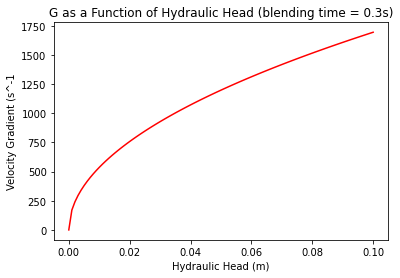

velocity graident at 0.02 meter of available headloss is 757.9883409887782


In [7]:
#calculation of G as a function of head loss in an open channel
g = 9.8 * (u.m/u.s**2)
water_density = ac.density_water(temp)
dynamic_viscosity = ac.viscosity_dynamic_water(temp)
blending_time = 0.3 * (u.s)
head_loss = (np.linspace(0, 0.1, 100))*(u.m)
G = (((head_loss*g*water_density)/(dynamic_viscosity*blending_time))**0.5).to(1/u.s)

#plot of G vs Hydraulic Head
fig, ax = plt.subplots()
ax.plot(head_loss, G, 'r-')
plt.xlabel('Hydraulic Head (m)')
plt.ylabel('Velocity Gradient (s^-1')
plt.savefig('Velocity Gradiet')
plt.title('G as a Function of Hydraulic Head (blending time = 0.3s)')
plt.show()

#interpolate to determine the achievable velocity graident (G) given availabe headloss in plant
available_headloss = 0.02 * (u.m)
G_achieved = np.interp(available_headloss.magnitude, head_loss, G)
print('velocity graident at', available_headloss, 'of available headloss is', G_achieved)

#Note: available headloss in plant will be provided by the Hydraulics team.  At the 
#moment 0.02m has been arbitrarily decided.  There is no definitive G value 
#for rapid mix; however, literature points at optimal ranges of G
#The maximum blending time (t=0.3s) comes from MWH textbook 

In [8]:
#determine necessary dimensions of channel in order to ensure minor headloss equal 
#to available_headloss value used in calculating G (flow expansion)

#assume that Froude number is 2 after expansion (Fr>1 in order to prevent 
#backwash).  Use Froude number and an arbitrary channel depth (Y2) to solve for 
#velocity (V2) after flow expansion
Froude2_oc = 2
Y2_oc = 2 * (u.m) #small enough to ensure eddies thoroughly mix 
Y1_oc = Y2_oc
V2_oc = (Froude2_oc*(g*Y2_oc)**0.5).to(u.m/u.s)

#minor headloss equation for open-channel (oc) flow expansion (max Q)- by using max Q
#we ensure that headloss will be within the available amount of headloss at all times
C_expansion = 0.3
Q_max = (fmt.q_max).to(u.m**3/u.s)
#solve for A2 (area after flow expansion) 
A2_oc = Q_max/V2_oc
#solve for A1 using open open-channel flow expansion equation
A1_oc = (((A2_oc**2)-((C_expansion*(Q_max**2))/(available_headloss*2*g)))**0.5).to(u.m**2)

#solve for dimensions of the open channel (one channel) using the above calculations
height = Y2_oc
width1_oc = (A1_oc/Y1_oc).to(u.m)
width2_oc = (A2_oc/Y2_oc).to(u.m)

#length will be determined later by calculating major headloss using Manning's principle.
#length will be dependent on spacial relationships of other unit processes

print('the height of the open channel (single flow) under assumed conditions is', height)
print('the width of the open channel (single flow) before coagulant addition under assumed conditions is', width1_oc)
print('the width of the open channel (single flow) after coagulant addition under assumed conditions is', width2_oc)

the height of the open channel (single flow) under assumed conditions is 2 meter
the width of the open channel (single flow) before coagulant addition under assumed conditions is 5.415e-16+8.843j meter
the width of the open channel (single flow) after coagulant addition under assumed conditions is 1.151 meter


In [9]:
#It is important to plot minor headloss as a function of Q!  There will not always be 
#a maximum Q flowing through; therefore, the minor headloss will decrease as Q
#decreases (thereby decreasing velocity gradient).  It may be beneficial to have 
#multiple rapid mix chambers to mitigate the effect of fluctuating Q on velocity gradient.
#more channels can be designed to achieve the same minor headloss for a lower maximum Q

Q_max = (fmt.q_ave).to(u.m**3/u.s)
print(Q_max)
#flow_range = (np.linspace(1, Q_max, 0.1))*(u.m**3/u.s)
#hm_range = ((C_expansion*(Q_max**2))/(2*g))*((1/(A2_oc**2))-(1/(A1_oc**2)))

#fig, ax = plt.subplots()
#ax.plot(flow_range, hm_range, 'r-')
#plt.xlabel('Flow Range (m**3/s)')
#plt.ylabel('hm_range (m)')
#plt.savefig('Minor Headloss at Flow Expansion as a Function of Flow Rate (Single Channel)')
#plt.title('Minor Headloss at Flow Expansion as a Function of Flow Rate (Single Channel)')
#plt.show()

9.061 meter ** 3 / second


**Preliminary Design - Hydraulic Jump**

Below are some prelinary calculations estimating the power dissipation in a hydraulic jump (given maximum flow).  The influent Froude number was chosen on 9 based on a Portland State University study citing this as number within a range for high levels of mixing (more research needs to be done to determine the optimal number).  V2 (velocity after the jump) was chosen arbitrarily.  The number "1" refers to flow before the jump and "2" refers to flow after the jump. More modeling is required to determine the headloss incurred by the hydraulic jump, the number of channels which should be present in the design, and the degree of mixing which is attained. 

In [0]:
#identify number of rapid mix units and flow through each
max_flow_per_jump = fmt.q_max/num_rm_units

#determine the height ratio between Y2 and Y1 based on desired F1
g = 9.8 * (u.m/u.s**2) 
F1 = 9
height_ratio = 0.5 * (((1+8*(F1**2))**0.5) - 1)
print('ratio of Y2 to Y1 is ', height_ratio)

#goal is to adjust height (Y1) to current flow rate
jump_width = 5 * (u.m)
V2 = 0.1 * (u.m/u.s) #function of necessary flow rate for flocculation 
V1 = V2 * height_ratio
Y1 = max_flow_per_jump/(jump_width*V1)

#calculate F2 given adjusted Y1
F2 = V2/(g*(height_ratio*Y1))**0.5

#calculate length of jump
L = 220 * Y1 * np.arctanh((F1-1)/22)

#calculate total energy flow difference between points 1 and 2
Y2 = height_ratio * Y1
theta = np.arctan((Y2-Y1)/L)
z1 = 0 * (u.m)
z2 = z1

Et1 = z1 + Y1*np.cos(theta) + (V1**2)/(2*g)
Et2 = z2 + Y2*np.cos(theta) + (V2**2)/(2*g)
energy_difference = Et2 - Et1

#determine power
spc_wght_water = g*ac.density_water(temp)
power = spc_wght_water * max_flow_per_jump * energy_difference
print(power.to(u.J/u.s))

#estimate volume of jump 
jump_volume_est = 0.5*jump_width*(Y2-Y1)*L

#estimate power dissipation for a given Q
G = power/jump_volume_est
print(G.to(u.W/u.m**3))

#**Design - Flocculation**

Flocculation is widely used in water treatment because of the use of sedimentation to remove particles from the water. Flocculation aims to increase the diameter of the particles through applying coagulant during rapid mix. In order to facilitate particle collisions, we must design a flocculator that takes into account collision potential and energy dissipation rate.
In our analysis, we will take into account the number of treatment trains, variation of flow rates, turbidity, and downstream H of the flocculation tank. In our design, we will use a horizontal hydraulic flocculator. We will use a residence time of 7.5 minutes, minimum width of 4 meters, and a flow rate of 720 cubic feet per second.
Outputs from our analysis will include the plan view area of the tank, the length of the channels, width of the channel, width and spacing of the baffles.

In [0]:
Inputs = Ntreatmetn trains, varation of flow rates(max), Varition of trubitiy(max), downstream H
Outputs = plan view area of floc, Lenght of the channels,
 width of channel, width of each bafflee, spacing between baffles

Pi = 3
Q = 720 * u.cubic_feet/u.s
K = 4
W = 4 * u.m
viscosity = pc.viscosity_kinematic_water(25*u.degC)
Gt = 37000
theta = 7.5 *u.min
G = Gt/theta
H = ((Pi**3*Q**3*K)/(W**3*2*viscosity*G**2))**(1/4)
print(H.to(u.m))

In [11]:
##HydraluicFloculator Code
class HydraluicFloculator:
    """Calculates physical dimensions of a HydraluicFloculator
    ----------------------------
    - BAFFLE_K (K or K_{baffle}): float
        - The minor loss coefficient of the flocculator baffles.
    - CHANNEL_N_MIN (N_{channel}: int
        - The minimum number of flocculator channels.
    - WS_RATIO_MIN (\Pi_{WS}): float
        - The minimum ratio between expansion height and baffle spacing
    - RATIO_MAX_WS (\Pi_{WS}): float
        - The maximum ratio between expansion height and baffle spacing
    - SDR (sdr): float
        - The standard dimension ratio.
    """

    # Increased both to provide a safety margin on flocculator head loss and
    # to simultaneously scale back on the actual collision potential we are
    # trying to achieve.
    # Originally calculated to be 2.3 from the equations:


    BAFFLE_K = 4
    CHANNEL_N_MIN = 1
    RATIO_MAX_WS = 3
    SDR = 41.0

    def __init__(
            self,
            Q=1 * u.L/u.s,
            temp=25 * u.degC,
            Gt=37000,
            HL = 40 * u.cm,
            downstream_H = 2 * u.m,
            channel_H = 4 * u.m,
            n_treatment_trains = 1,
            ):

        self.Q = Q
        self.temp = temp
        self.Gt = Gt
        self.HL = HL
        self.downstream_H = downstream_H
        self.channel_H = channel_H
        self.n_treatment_trains = n_treatment_trains


    @property
    def vel_grad_avg(self):
        #NOTE: this is borrowed from AguaClara source code
        """Calculate the average velocity gradient (G-bar) of water flowing
        through the flocculator.
        :returns: Average velocity gradient (G-bar)
        :rtype: float * 1 / second
        """
        return ((u.standard_gravity * self.HL) /
               (pc.viscosity_kinematic_water(self.temp) * self.Gt)).to(u.s ** -1)

    @property
    def retention_time(self):
        #NOTE: this is borrowed from AguaClara source code
        """Calculates the hydraulic retention time neglecting the volume created by head loss in the flocculator.
        :returns: Hydraulic retention time (:math:`\theta`)
        :rtype: float * second
        """
        return (self.Gt / self.vel_grad_avg).to(u.s)
     @property
    def total_vol(self):
        #NOTE: this is borrowed from AguaClara source code
        """Calculate the target volume (not counting the volume added by head loss) of the flocculator.
        :returns: Target volume
        :rtype: float * meter ** 3
        """
        return (self.Q * self.retention_time).to(u.m ** 3)

    @property
    def treatment_train_vol(self):
        #NOTE: this is borrowed from AguaClara source code
        """Calculate the target volume (not counting the volume added by head loss) of the flocculator.
        :returns: Target volume
        :rtype: float * meter ** 3
        """
        return (self.total_vol/self.n_treatment_trains).to(u.m ** 3)

    @property
    def baffle_W(self):
       """This function calculates the baffle width by multiplying by the maximum width to spacing ratio"""
       return (((self.RATIO_MAX_WS**3*self.Q**3*self.BAFFLE_K)/
                (self.channel_H**3*2*pc.viscosity_kinematic_water(self.temp)*self.vel_grad_avg**2))**(1/4)).to(u.m)

    @property
    def baffle_S(self):
      #NOTE: This is borrowed from AguaClara source code
        """Return the spacing between baffles.
        :returns: Spacing between baffles
        :rtype: int
        """
        return (self.baffle_W/3).to(u.m)

    @property
    def channel_W(self):
       """This function calculates the channel width by adding baffle width and baffle spacing"""
       return (self.baffle_W+self.baffle_S).to(u.m)


    @property
    def channel_L(self):
        """This function determines channel length based the largest square that fits inside of the selected tank. So, channel length is the the length of the square"""
        return (self.treatment_train_vol/(self.channel_W*self.channel_H)).to(u.m)
        
    @property
    def side_view_area(self):
        """This function calculates the necessary active cross sectional area of the flocculator"""
        return (self.treatment_train_vol/self.channel_W).to(u.m**2)
    
     @property
    def plan_view_area(self):
        """This function calculates the plan view area of the flocculator"""
        return (self.treatment_train_vol/self.channel_H).to(u.m**2)

    @property
    def baffle_n(self):
        """This function calclulates the number of the baffles in the flocculator."""
        return (np.ceil((self.channel_L/self.baffle_S))).to(u.dimensionless)

    @property
    def vel_scour(self):
        """This function calclulates the number of the baffles in the flocculator."""
        return (self.Q/(self.channel_H*self.baffle_S)).to(u.m/u.s)

    @property
    def design(self):
        """Returns the designed values.
        :returns: list of designed values (G, t, channel_W, obstacle_n)
        :rtype: int
        """
        floc_dict = {'total_vol': self.total_vol,
                     'treatment_train_vol': self.treatment_train_vol,
                     'side_view_area': self.side_view_area,
                     'plan_view_area': self.plan_view_area,
                     'channel_L': self.channel_L,
                     'channel_W': self.channel_W,
                     'channel_H': self.channel_H,
                     'baffle_S': self.baffle_S,
                     'baffle_W': self.baffle_W,
                     'baffle_n': self.baffle_n,
                     'G': self.vel_grad_avg,
                     't': self.retention_time,
                     'vel_scour': self.vel_scour}
        return floc_dict
##make a data frame to show results
q  = 720 * u.cubic_feet/u.s #change this flow rate in order to display design specs for the HydraluicFloculator handling that flow rate
tester=HydraluicFloculator(Q=q)
#print(type(HydraluicFloculator(n_treatment_trains=1, Q=q).total_vol))

row_names = ['Total Volume', 
                'Volume of Treatment Train', 
                'Side View Area', 
                'Plan View Area', 
                'Channel Length', 
                'Channel Width', 
                'Channel Height', 
                'Baffle Spacing', 
                'Baffle Width', 
                'Number of Baffles',
                'Scour Velocity']
  
df=pd.DataFrame()
for i in range(1, 9):
  data = [HydraluicFloculator(n_treatment_trains=i, Q=q).total_vol,
          HydraluicFloculator(n_treatment_trains=i, Q=q).treatment_train_vol,
          HydraluicFloculator(n_treatment_trains=i, Q=q).side_view_area,
          HydraluicFloculator(n_treatment_trains=i, Q=q).plan_view_area,
          HydraluicFloculator(n_treatment_trains=i, Q=q).channel_L,
          HydraluicFloculator(n_treatment_trains=i, Q=q).channel_W,
          HydraluicFloculator(n_treatment_trains=i, Q=q).channel_H,
          HydraluicFloculator(n_treatment_trains=i, Q=q).baffle_S,
          HydraluicFloculator(n_treatment_trains=i, Q=q).baffle_W,
          HydraluicFloculator(n_treatment_trains=i, Q=q).baffle_n,
          HydraluicFloculator(n_treatment_trains=i, Q=q).vel_scour]
  df[str(i)+' Treatment Trains'] = pd.Series(data,index=row_names)
print(df)


class Floc_7_5_min_res(Flocculatorita):
  """This class models a flocculatorita with 1 minute residence time"""
  @property
  def retention_time(self):
    return 7.5*u.min
 @property
  def vol(self):
    return ((self.Q*self.retention_time).to(u.L))


IndentationError: ignored